## Overview Laurentia map

This notebook generates an overview map of Laurentia using the polygons of Whitmeyer and Karlstrom (2007) to contextualize the location of the ECMB pole.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.feature import ShapelyFeature
from cartopy.feature import NaturalEarthFeature, COLORS
import numpy as np
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag

duluth_lat = 46.8
duluth_lon = 267.9

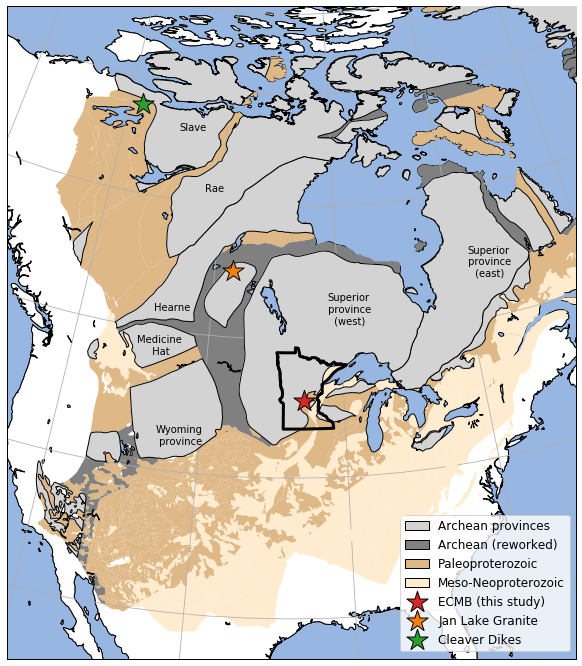

In [3]:
central_lat = duluth_lat
central_lon = duluth_lon
extent = [duluth_lon-27, duluth_lon+20, duluth_lat-22, duluth_lat+32]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 12))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

land = NaturalEarthFeature(category='physical', name='land',
                            scale='50m', facecolor=COLORS['land'])

ax.add_feature(land, facecolor='white',edgecolor='black')

shpfilename = '../Data/GIS/Whitmeyer2007.shp'

reader = shpreader.Reader(shpfilename)
units = reader.records()

for unit in units:

#     if unit.attributes['Unit'] == 'Basin' or \
#        unit.attributes['Unit'] == '2.5 - 2.0 Ga miogeoclinal sediments':
#             ax.add_geometries([unit.geometry], ccrs.PlateCarree(),
#                   facecolor='lightyellow',
#                   label=unit.attributes['Unit'])
            
    if unit.attributes['Unit'] == 'Basin':
            ax.add_geometries([unit.geometry], ccrs.PlateCarree(),
                  facecolor='BlanchedAlmond',
                  label=unit.attributes['Unit'])

    elif unit.attributes['Unit'] == '1.9 - 1.8 Ga reworked Archean crust':
        ax.add_geometries([unit.geometry], ccrs.PlateCarree(),
                  facecolor='grey',
                  label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile orogens' or \
         unit.attributes['Unit'] == '2.0 - 1.8 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.80 - 1.76 Ga juvenile arcs' or \
         unit.attributes['Unit'] == '1.76 - 1.72 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.72 - 1.68 Ga granitoids' or \
         unit.attributes['Unit'] == '1.69 - 1.65 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.65 - 1.60 Ga granitoids' or \
         unit.attributes['Unit'] == 'approx 1.70 Ga quartzite deposits' or \
         unit.attributes['Unit'] == 'approx. 1.65 Ga quartzite deposits':
        ax.add_geometries([unit.geometry], ccrs.PlateCarree(),
                           facecolor='BurlyWood',
                           label=unit.attributes['Unit'])
    elif unit.attributes['Unit'] == '1.55 - 1.35 Ga juvenile crust' or \
         unit.attributes['Unit'] == '1.45 - 1.35 Ga granitoids' or \
         unit.attributes['Unit'] == '1.3 - 1.0 Ga collisional orogens' or \
         unit.attributes['Unit'] == '1.3 - 0.95 Ga granitoids' or \
         unit.attributes['Unit'] == '1.2 - 1.1 Ga Midcontinent rift system':
        ax.add_geometries([unit.geometry], ccrs.PlateCarree(),
                           facecolor='BlanchedAlmond',
                           label=unit.attributes['Unit'])
        
    elif unit.attributes['Unit'] == '> 2.5 Ga Archean crust':
        ax.add_geometries([unit.geometry], ccrs.PlateCarree(),
                      facecolor='lightgrey',edgecolor='black',
                      label=unit.attributes['Unit'],zorder=80)
        
    elif unit.attributes['Unit'] == 'Eastern rift basins':
        ax.add_geometries([unit.geometry], ccrs.PlateCarree(),
                      facecolor='BlanchedAlmond',
                      label=unit.attributes['Unit'],zorder=81)
        
MN_shape = '../Data/GIS/MN_outline.shp'

shape_feature = ShapelyFeature(shpreader.Reader(MN_shape).geometries(),
                                ccrs.PlateCarree())
ax.add_feature(shape_feature,facecolor='none', linewidth=3,edgecolor='black',zorder=99,label='MN outline')


ax.gridlines()

ocean = NaturalEarthFeature(category='physical', name='ocean',
                            scale='50m', facecolor=COLORS['water'])
lakes = NaturalEarthFeature(category='physical', name='lakes',
                            scale='50m', facecolor=COLORS['water'])
ax.add_feature(lakes, edgecolor='black')
ax.add_feature(ocean, edgecolor='black',zorder=-1)


plt.text(-89, 51, 'Superior\n province\n (west)',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-72, 53, 'Superior\n province\n (east)',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-107,42, 'Wyoming\n province',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-110.25,48.25, 'Medicine\n Hat',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-109.5,51.5, 'Hearne',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

plt.text(-106,61, 'Rae',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

# plt.text(-50,73, 'Rae',
#          horizontalalignment='center',
#          transform=ccrs.Geodetic(),zorder=101)

# plt.text(-47,63.8, 'North\nAtlantic',
#          horizontalalignment='center',
#          transform=ccrs.Geodetic(),zorder=101)

plt.text(-110,66, 'Slave',
         horizontalalignment='center',
         transform=ccrs.Geodetic(),zorder=101)

ECMB = plt.scatter(-94.26, 45.53, s=500,marker='*',zorder=101,c='C3',edgecolors='k',
         transform=ccrs.Geodetic(),label='ECMB (this study)')

Jan = plt.scatter(257.2, 54.9, s=500,marker='*',zorder=101,c='C1',edgecolors='k',
         transform=ccrs.Geodetic(), label='Jan Lake Granite')

Cleaver = plt.scatter(241.97, 67.5, s=500,marker='*',zorder=101,c='C2',edgecolors='k',
         transform=ccrs.Geodetic(), label='Cleaver Dikes')

legend_elements = [Patch(facecolor='lightgrey', edgecolor='k',
                         label='Archean provinces'),
                   Patch(facecolor='grey', edgecolor='k',
                         label='Archean (reworked)'),
                    Patch(facecolor='BurlyWood', edgecolor='k',
                         label='Paleoproterozoic'),
                    Patch(facecolor='BlanchedAlmond', edgecolor='k',
                         label='Meso-Neoproterozoic'),
                   ECMB,Jan,Cleaver]

plt.legend(handles=legend_elements, loc='upper right',
           bbox_to_anchor=(1,0.23), fancybox=True, fontsize = 12)


plt.savefig('visualizations/Laurentia_map.pdf', bbox_inches = 'tight', pad_inches = 0,markerscale=0.8)
plt.show()